# StateWise Analyis of Electric Vehicle sales for the FY23-24

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

About Data:
    
    Data of number of vechicles sold in the country statewise and EV categories for the FY 2023-2024.
    It has three main columns:
    state: State names
    category: Ev categories
    totl: total vechicles sold

ExternalLink:
https://vahan.parivahan.gov.in/vahan4dashboard/vahan/vahan/view/reportview.xhtml

In [2]:
data = pd.read_csv('StatewiseEVdataFY23-24.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   s.no        77 non-null     int64  
 1   state       77 non-null     object 
 2   category    77 non-null     object 
 3   total       77 non-null     int64  
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(5), int64(2), object(2)
memory usage: 5.5+ KB


In [5]:
data.drop(['s.no','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [155]:
data

,state,category,total
0,Andaman & Nicobar Island,ELECTRIC(BOV),36
1,Andhra Pradesh,ELECTRIC(BOV),36204
2,Andhra Pradesh,STRONG HYBRID EV,27
3,Arunachal Pradesh,ELECTRIC(BOV),33
4,Arunachal Pradesh,STRONG HYBRID EV,1
...,...,...,...
72,Uttar Pradesh,PURE EV,58
73,Uttar Pradesh,STRONG HYBRID EV,139
74,West Bengal,ELECTRIC(BOV),26646
75,West Bengal,PURE EV,7


In [6]:
data.shape

(77, 3)

In [7]:
data.dtypes

state       object
category    object
total        int64
dtype: object

In [8]:
data.isnull().sum()

state       0
category    0
total       0
dtype: int64

### Univariate Analysis

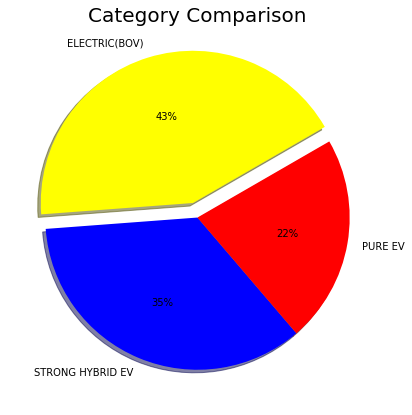

In [10]:
plt.figure(figsize=(12,7))
plt.pie(data['category'].value_counts(), labels= data['category'].unique(), 
        colors=['yellow','blue','red','green','orange'], autopct='%.0f%%', explode = [0.1, 0,0], shadow = True, startangle=30)
plt.title('Category Comparison',fontsize=20, color = 'Black')
plt.show()

Insights:
    
    Among overall EV sales across all states of India : Electric(Battery Operated Vehicles) has the heighest part of 43% and next to it comes Strong Hybrid Vehicles.

In [71]:
state=data.groupby('state')['total'].sum().sort_values(ascending=False)

In [72]:
state

state
Uttar Pradesh               306122
Maharashtra                 212784
Karnataka                   170490
Tamil Nadu                  101345
Rajasthan                    99758
Bihar                        96492
Gujarat                      88551
Kerala                       80992
Delhi                        79184
Madhya Pradesh               77229
Assam                        63457
Odisha                       51996
Chhattisgarh                 42065
Andhra Pradesh               36231
Haryana                      33559
Punjab                       32012
West Bengal                  26668
Jharkhand                    22345
Uttarakhand                  17241
Jammu and Kashmir            11668
Goa                          11045
Tripura                       7568
Chandigarh                    6554
Puducherry                    3250
Himachal Pradesh              1192
Meghalaya                      498
Mizoram                        275
Manipur                        269
DNH and DD    

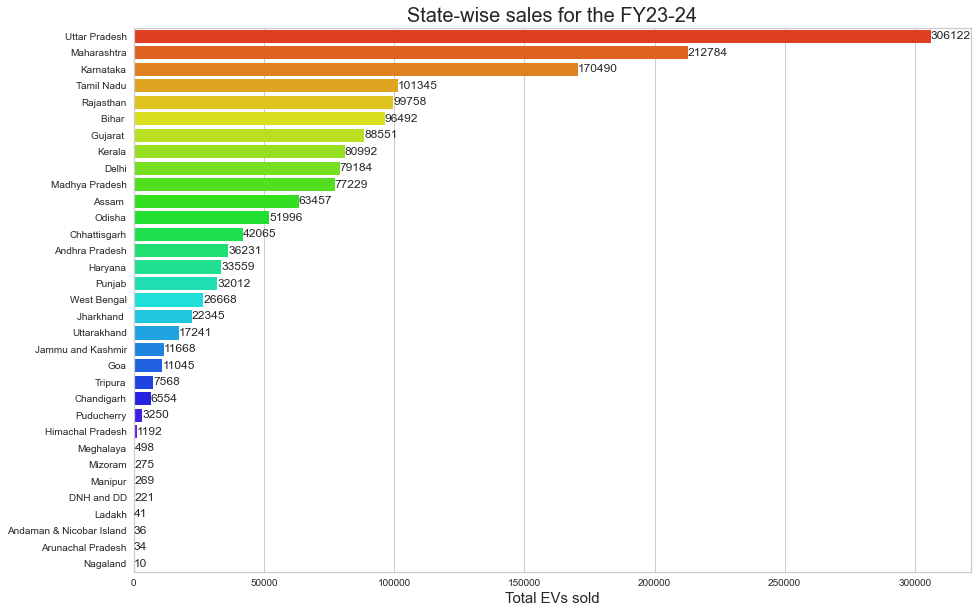

In [73]:
plt.figure(figsize=(15,10))
f = sns.barplot(x=state.values,y=state.index,palette = 'hsv')
f.bar_label(f.containers[0])
plt.xlabel('Total EVs sold',fontsize='15')
plt.ylabel('',fontsize='15')
plt.title('State-wise sales for the FY23-24', fontsize='20')
plt.show()

Insights:
    
    UttarPradesh takes the first place with 306122 vechicles sold and next comes Maharastra with 212784 vehicles and next Karnataka with 170490 vehicles.
    Sikkim has 0 sales.

### Bivariate Analysis

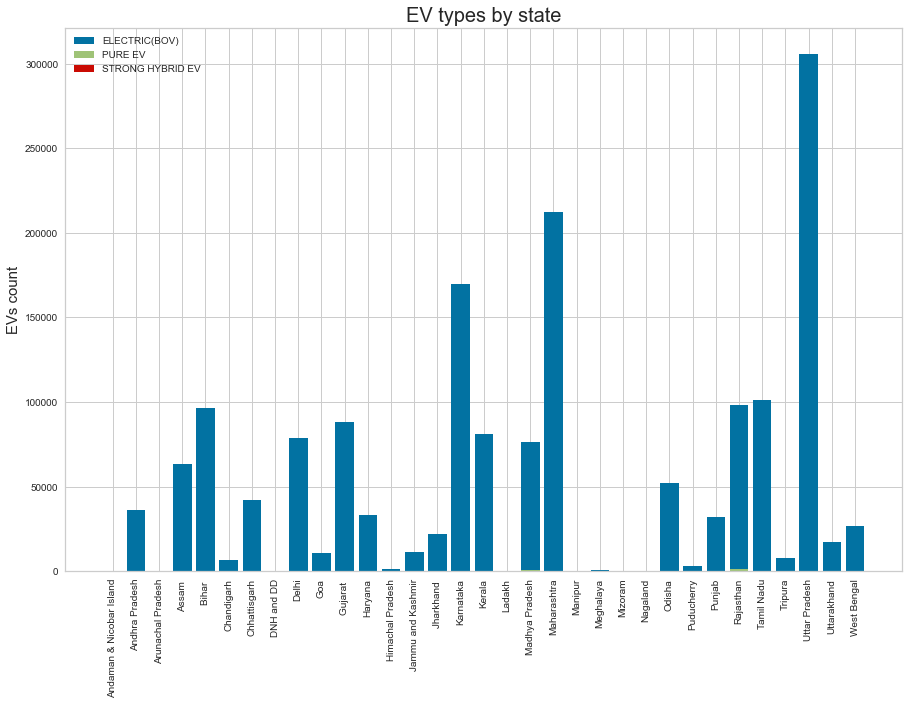

In [78]:
## grouping data by state and type , counting each type in each group
group_data = data.groupby(['state','category'])['total'].sum().reset_index(name='count')

plt.figure(figsize=(15,10))

for state,cat in group_data.groupby('category'):
    plt.bar(cat['state'],cat['count'],label=state)
    
plt.xlabel('', fontsize=15)    
plt.ylabel('EVs count', fontsize=15)
plt.title('EV types by state', fontsize=20)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [133]:
df1

,state,count_cat
0,Andaman & Nicobar Island,1
1,Andhra Pradesh,2
2,Arunachal Pradesh,2
3,Assam,2
4,Bihar,3
5,Chandigarh,2
6,Chhattisgarh,3
7,DNH and DD,2
8,Delhi,3
9,Goa,3


In [131]:
list(df1[df1.count_cat==3]['state'])

['Bihar ',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat ',
 'Jammu and Kashmir',
 'Jharkhand ',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [141]:
df_pivot = data.pivot(index='state', columns='category', values='total')
df_pivot

category,ELECTRIC(BOV),PURE EV,STRONG HYBRID EV
state,,,
Andaman & Nicobar Island,36.0,NaN,NaN
Andhra Pradesh,36204.0,NaN,27.0
Arunachal Pradesh,33.0,NaN,1.0
Assam,63443.0,NaN,14.0
Bihar,96465.0,18.0,9.0
Chandigarh,6548.0,NaN,6.0
Chhattisgarh,42024.0,22.0,19.0
DNH and DD,218.0,NaN,3.0
Delhi,78916.0,12.0,256.0


    Rajasthan,UttarPradesh,WestBengal,Uttarakhand,Punjab,Odisha,Maharashtra,Kerala,Karnataka,Jharkhand,Jammu and Kashmir,GUjarat,Goa,Delhi,Chhattisgharand Bihar are the states with all the three categoris.


    AndhraPradesh,ArunachalPradesh,Assam,Chandighar,DNH&DD,Haryana,Himachal Pradesh and TamilNadu are the states with only two categories of vehicles ie;Electric and StrongHybridEV.